In [0]:
# Il dataset è disponibile al seguente link: https://www.kaggle.com/alessiocorrado99/animals10

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile 
zip_file= zipfile.ZipFile('/content/drive/My Drive/animals10.zip','r')
zip_file.extractall()
zip_file.close()

In [0]:
import os, os.path
import shutil
import glob
from keras.preprocessing import image
from keras.applications import vgg16
from keras.models import Model
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
def check_folder(dir_name):
  if (os.path.isdir("/content/drive/My Drive/dataset/{}".format(dir_name))):
    shutil.rmtree("/content/drive/My Drive/dataset/{}".format(dir_name))
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name))

In [0]:
check_folder("train_imgs")
check_folder("test_imgs")

In [0]:
def create_subfolder(dir_name):
  if (os.path.isdir("/content/drive/My Drive/dataset/{}".format(dir_name))):
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"cane")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"cavallo")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"elefante")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"farfalla") 
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"gallina")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"gatto")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"mucca")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"pecora")
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"ragno") 
    os.mkdir("/content/drive/My Drive/dataset/{}".format(dir_name)+"/"+"scoiattolo") 


In [0]:
create_subfolder("train_imgs")
create_subfolder("test_imgs")

In [0]:
def get_number_imgs(dir_name):
    count=0
    for img in os.listdir("animals/raw-img/{}".format(dir_name)): 
        count+=1
    return count

In [0]:
def split_images(dir_name):
    
    source_dir="animals/raw-img/{}".format(dir_name)
    total_imgs=get_number_imgs(dir_name)
    
    i=1
    for filename in os.listdir(source_dir):
        if(i<=total_imgs):
            os.rename(source_dir+"/"+filename,source_dir+"/{}_{}.jpeg".format(dir_name,i))
        i+=1
            

In [0]:
split_images("cane")
split_images("cavallo")
split_images("elefante")
split_images("farfalla")
split_images("gallina")
split_images("gatto")
split_images("mucca")
split_images("pecora")
split_images("ragno")
split_images("scoiattolo")

In [0]:
def get_numbers(dir_name):
    
    source_dir="animals/raw-img/{}".format(dir_name)
    
    numbers=[]
    
    for filename in os.listdir(source_dir):
        name=filename.split('.')[0]
        n=name.split('_')[1]
        number=int(n)
        numbers.append(number)
    
    return sorted(numbers)

In [0]:
def pick_img_train(dir_name,limit=300):
    
    source_dir="animals/raw-img/{}".format(dir_name)
    target_dir="/content/drive/My Drive/dataset/train_imgs/{}".format(dir_name)
    
    numbers=get_numbers(dir_name)
    
    count=0
    i=0

    while(count<limit):
      shutil.copy(source_dir+"/{}_{}.jpeg".format(dir_name,numbers[i]),
                  target_dir+"/{}_{}.jpeg".format(dir_name,numbers[i]))
      
      count+=1
      i+=1

In [0]:
pick_img_train("cane")
pick_img_train("cavallo")
pick_img_train("elefante")
pick_img_train("farfalla")
pick_img_train("gallina")
pick_img_train("gatto")
pick_img_train("mucca")
pick_img_train("pecora")
pick_img_train("ragno")
pick_img_train("scoiattolo")

In [0]:
def pick_img_test(dir_name,limit=510):
    
    source_dir="animals/raw-img/{}".format(dir_name)
    target_dir="/content/drive/My Drive/dataset/test_imgs/{}".format(dir_name)
    
    numbers=get_numbers(dir_name)
    
    count=310
    i=310
    while(count<limit):
      shutil.copy(source_dir+"/{}_{}.jpeg".format(dir_name,numbers[i]),
                  target_dir+"/{}_{}.jpeg".format(dir_name,numbers[i]))
      
      count+=1
      i+=1
      

In [0]:
pick_img_test("cane")
pick_img_test("cavallo")
pick_img_test("elefante")
pick_img_test("farfalla")
pick_img_test("gallina")
pick_img_test("gatto")
pick_img_test("mucca")
pick_img_test("pecora")
pick_img_test("ragno")
pick_img_test("scoiattolo")

In [34]:
base_net=vgg16.VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 3s 0us/step


In [35]:
net=Model(input=base_net.input,output=base_net.output)
net.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


In [0]:
def load_images(dir_name,neural_network):

  vgg16_feature_list = []
  names=["cane","cavallo","elefante","farfalla","gallina","gatto","mucca","pecora","ragno","scoiattolo"]
  root_dir="drive/My Drive/dataset/{}".format(dir_name)

  source_dir_list=[]

  for name in names:
    source_dir_list.append(root_dir+"/"+name)

  for folder in source_dir_list:
    for img in glob.glob(os.path.join(folder,"*")):
      img = image.load_img(img, target_size=(224,224))
      img = image.img_to_array(img)
      img = np.expand_dims(img, axis=0)
      img = vgg16.preprocess_input(img)

      vgg16_feature = neural_network.predict(img)
      vgg16_feature_np = np.array(vgg16_feature)
      vgg16_feature_list.append(vgg16_feature_np.flatten())


  vgg16_feature_list_np = np.array(vgg16_feature_list)

  return vgg16_feature_list_np

  

In [0]:
train_images=load_images("train_imgs",net)

In [0]:
test_images=load_images("test_imgs",net)

In [0]:
def create_labels(dir_name):
  names=["cane","cavallo","elefante","farfalla","gallina","gatto","mucca","pecora","ragno","scoiattolo"]
  root_dir="drive/My Drive/dataset/{}".format(dir_name)

  source_dir_list=[]

  for name in names:
    source_dir_list.append(root_dir+"/"+name)

  labels_list=[]

  for folder in source_dir_list:
    for img in os.listdir(folder):
      name=img.split('.')[0]
      label=name.split('_')[0]
      if(label=="cane"):
        labels_list.append(0)
      if(label=="cavallo"):
        labels_list.append(1)
      if(label=="elefante"):
        labels_list.append(2)
      if(label=="farfalla"):
        labels_list.append(3)
      if(label=="gallina"):
        labels_list.append(4)
      if(label=="gatto"):
        labels_list.append(5)
      if(label=="mucca"):
        labels_list.append(6)
      if(label=="pecora"):
        labels_list.append(7)
      if(label=="ragno"):
        labels_list.append(8)
      if(label=="scoiattolo"):
        labels_list.append(9)

  return labels_list





In [0]:
train_labels=create_labels("train_imgs")

In [0]:
test_labels=create_labels("test_imgs")

In [41]:
classifier=LogisticRegression(class_weight='balanced', multi_class="auto",max_iter=200, random_state=1,solver='newton-cg')
classifier.fit(train_images,train_labels)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_set_pred=classifier.predict(train_images)

In [43]:
accuracy_score(train_set_pred,train_labels)

1.0

In [0]:
test_set_pred=classifier.predict(test_images)

In [45]:
print("CLASSIFICATION REPORT FOR THE FIRST CUT\n")
print(classification_report(test_set_pred,test_labels))

CLASSIFICATION REPORT FOR THE FIRST CUT

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       186
           1       0.90      0.86      0.88       207
           2       0.94      0.95      0.95       198
           3       0.98      0.92      0.95       212
           4       0.96      0.95      0.95       203
           5       0.94      0.96      0.95       195
           6       0.86      0.87      0.87       199
           7       0.88      0.88      0.88       198
           8       0.95      0.95      0.95       199
           9       0.95      0.94      0.95       203

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



CONFUSION MATRIX FOR THE FIRST CUT



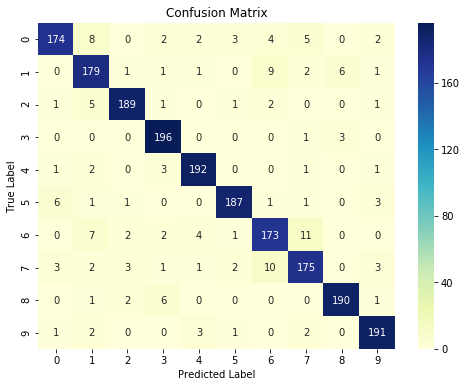

In [47]:
print("CONFUSION MATRIX FOR THE FIRST CUT\n")

%matplotlib inline

matrix = confusion_matrix(test_labels,test_set_pred)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt="d")
ax.set_ylim(len(matrix)-0.01, -0.01)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

In [48]:
net_2=Model(input=base_net.input,output=base_net.layers[-5].output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


In [49]:
net_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
train_images_2=load_images("train_imgs",net_2)

In [0]:
test_images_2=load_images("test_imgs",net_2)

In [52]:
classifier_2=LogisticRegression(class_weight='balanced', multi_class="auto",max_iter=200, random_state=1,solver='newton-cg')
classifier_2.fit(train_images_2,train_labels)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_set_pred_2=classifier_2.predict(train_images_2)

In [54]:
accuracy_score(train_set_pred_2,train_labels)

1.0

In [0]:
test_set_pred_2=classifier_2.predict(test_images_2)

In [57]:
print("CLASSIFICATION REPORT FOR THE SECOND CUT\n")
print(classification_report(test_set_pred_2,test_labels))

CLASSIFICATION REPORT FOR THE SECOND CUT

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       197
           1       0.78      0.82      0.80       190
           2       0.91      0.88      0.90       206
           3       0.92      0.91      0.92       202
           4       0.89      0.87      0.88       203
           5       0.80      0.80      0.80       200
           6       0.69      0.77      0.73       179
           7       0.70      0.74      0.72       189
           8       0.93      0.86      0.89       215
           9       0.85      0.78      0.82       219

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



CONFUSION MATRIX FOR THE SECOND CUT


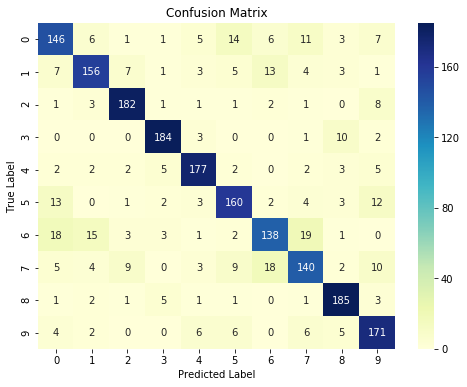

In [58]:
print("CONFUSION MATRIX FOR THE SECOND CUT")

%matplotlib inline

matrix = confusion_matrix(test_labels,test_set_pred_2)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt="d")
ax.set_ylim(len(matrix)-0.01, -0.01)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

In [22]:
new_base_net=vgg16.VGG16(input_shape=(224,224,3),weights='imagenet',include_top=True)





553467904/553467096 [==============================] - 17s 0us/step








In [23]:
net_3=Model(input=new_base_net.input,output=new_base_net.layers[-2].output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  """Entry point for launching an IPython kernel.


In [24]:
net_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
train_images_3=load_images("train_imgs",net_3)

In [0]:
test_images_3=load_images("test_imgs",net_3)

In [27]:
classifier_3=LogisticRegression(class_weight='balanced', multi_class="auto",max_iter=200, random_state=1,solver='newton-cg')
classifier_3.fit(train_images_3,train_labels)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_set_pred_3=classifier_3.predict(train_images_3)

In [30]:
accuracy_score(train_set_pred_3,train_labels)

1.0

In [0]:
test_set_pred_3=classifier_3.predict(test_images_3)

In [32]:
print("CLASSIFICATION REPORT FOR THE THIRD CUT\n")
print(classification_report(test_set_pred_3,test_labels))

CLASSIFICATION REPORT FOR THE THIRD CUT

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       217
           1       0.93      0.91      0.92       205
           2       0.92      0.95      0.93       193
           3       0.95      0.95      0.95       201
           4       0.95      0.97      0.96       195
           5       0.94      0.96      0.95       196
           6       0.84      0.84      0.84       200
           7       0.88      0.91      0.89       192
           8       0.96      0.96      0.96       200
           9       0.95      0.95      0.95       201

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



CONFUSION MATRIX FOR THE THIRD CUT



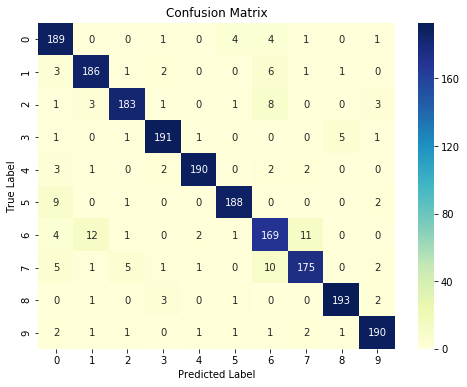

In [59]:
print("CONFUSION MATRIX FOR THE THIRD CUT\n")

%matplotlib inline

matrix = confusion_matrix(test_labels,test_set_pred_3)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matrix,annot=True,cbar=True, cmap="YlGnBu", fmt="d")
ax.set_ylim(len(matrix)-0.01, -0.01)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()